<a href="https://colab.research.google.com/github/patricio-tech/proyectos/blob/master/gye.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Datos AMI usuarios GUAYAQUIL
Redes neuronales convolucionales

Edwin Solís

2020




###RED NEURONAL CONVOLUCIONAL CLASIFICADOR USUARIOS GUAYAQUIL

In [ ]:
!wget --no-check-certificate \
   https://www.dropbox.com/s/f59wm4j61e67zrx/gye.zip?dl=0\
   -O /tmp/gye.zip




--2020-09-01 05:21:39--  https://www.dropbox.com/s/f59wm4j61e67zrx/gye.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601d:1::a27d:501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/f59wm4j61e67zrx/gye.zip [following]
--2020-09-01 05:21:39--  https://www.dropbox.com/s/raw/f59wm4j61e67zrx/gye.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc8c699612f13ceb1805f7eb7983.dl.dropboxusercontent.com/cd/0/inline/A-j2_HyxWUUD6bHGZdGbXOkfaOqHAiY8_u5tiWFlqFanxgLigA8BWlMEx8jvSWfcuvKTSzEAocppgixOR22vhWe6WUOtcllfz3lH10lEoBJJYqQ0-sU1Tz66iDVGwWvfVZk/file# [following]
--2020-09-01 05:21:40--  https://uc8c699612f13ceb1805f7eb7983.dl.dropboxusercontent.com/cd/0/inline/A-j2_HyxWUUD6bHGZdGbXOkfaOqHAiY8_u5tiWFlqFanxgLigA8BWlMEx8jvSWfcuvKTSzEAocppgixOR22vhWe6WUOtcllfz3lH10lEoBJJYqQ0-sU1Tz66iDVG

In [ ]:
import os
import zipfile

local_zip = '/tmp/gye.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/gye'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_normal_dir = os.path.join(train_dir, 'normal')
train_fault_dir = os.path.join(train_dir, 'infractor')

# Directorio con las imagenes de validation
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_fault_dir = os.path.join(validation_dir, 'infractor')

# Directorio con las imagenes de test
test_normal_dir = os.path.join(test_dir, 'normal')
test_fault_dir = os.path.join(test_dir, 'infractor')

In [ ]:
train_normal_fnames = os.listdir( train_normal_dir )
print(train_normal_fnames[:5])

train_fault_fnames = os.listdir( train_fault_dir )
print(train_fault_fnames[:5])

validation_normal_fnames = os.listdir( validation_normal_dir )
print(validation_normal_fnames[:5])

validation_fault_fnames = os.listdir( validation_fault_dir )
print(validation_fault_fnames[:5])

test_normal_fnames = os.listdir( test_normal_dir )
print(test_normal_fnames[:5])

test_fault_fnames = os.listdir( test_fault_dir )
print(test_fault_fnames[:5])

['gye15.jpg', 'gye7.jpg', 'gye21.jpg', 'gye24.jpg', 'gye12.jpg']
['gye7.jpg', 'gye3.jpg', 'gye6.jpg', 'gye5.jpg', '.DS_Store']
['gye3.jpg', '.DS_Store', 'gye2.jpg', 'gye0.jpg', 'gye1.jpg']
['.DS_Store', 'gye0.jpg']
['gye3.jpg', '.DS_Store', 'gye2.jpg', 'gye0.jpg', 'gye1.jpg']
['.DS_Store', 'gye0.jpg', 'gye1.jpg']


In [ ]:
print('total training normal images :', len(os.listdir(train_normal_dir ) ))
print('total training fault images :', len(os.listdir(train_fault_dir ) ))

print('total validation normal images :', len(os.listdir( validation_normal_dir ) ))
print('total validation fault images :', len(os.listdir( validation_fault_dir ) ))

print('total test normal images :', len(os.listdir( test_normal_dir ) ))
print('total test fault images :', len(os.listdir( test_fault_dir ) ))

total training normal images : 39
total training fault images : 10
total validation normal images : 6
total validation fault images : 2
total test normal images : 6
total test fault images : 3


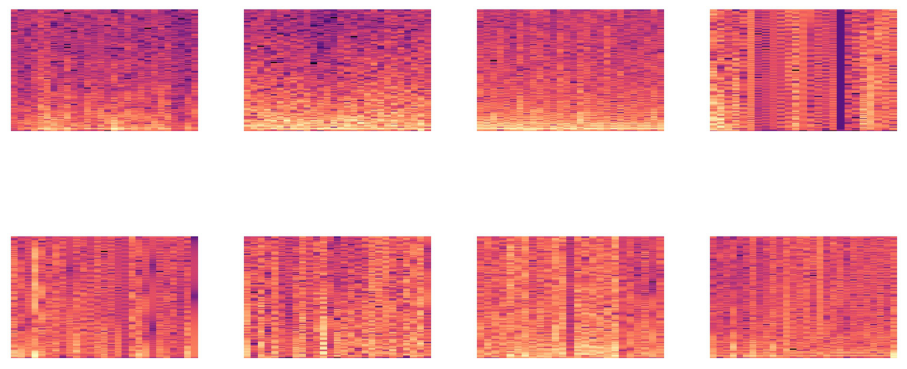

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_normal_pix = [os.path.join(train_normal_dir, fname)
                for fname in train_normal_fnames[ pic_index-8:pic_index]
]

for i, img_path in enumerate(next_normal_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

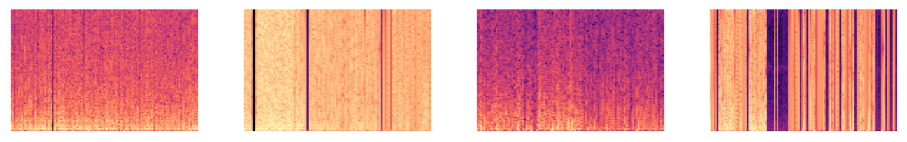

In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0 # Índice para iterar sobre las imagenes

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=4

next_normal_pix = [os.path.join(train_fault_dir, fname)
                for fname in train_fault_fnames[ 0:pic_index]
]

for i, img_path in enumerate(next_normal_pix):
   sp = plt.subplot(nrows, ncols, i + 1)
   sp.axis('Off') # no imprimir ejes
   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=1e-4),
   loss='binary_crossentropy',
   metrics = ['acc']
   )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode='binary',
                  target_size=(150, 150))

validation_generator = validation_datagen.flow_from_directory(train_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

test_generator = test_datagen.flow_from_directory(test_dir,
                  batch_size=20,
                  class_mode = 'binary',
                  target_size = (150, 150))

Found 47 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 7 images belonging to 2 classes.


In [ ]:
batch_size = 20
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

2
2


In [ ]:
history = model.fit_generator(
             train_generator,
             steps_per_epoch= steps_per_epoch,
             epochs=15,
             validation_data=validation_generator,
             validation_steps= validation_steps,
             verbose=2)

Epoch 1/15
2/2 - 1s - loss: 0.7009 - acc: 0.8519 - val_loss: 0.6131 - val_acc: 0.7750
Epoch 2/15
2/2 - 1s - loss: 0.5527 - acc: 0.8148 - val_loss: 0.5182 - val_acc: 0.8000
Epoch 3/15
2/2 - 1s - loss: 0.5029 - acc: 0.8148 - val_loss: 0.4963 - val_acc: 0.8250
Epoch 4/15
2/2 - 1s - loss: 0.5171 - acc: 0.8000 - val_loss: 0.5061 - val_acc: 0.8000
Epoch 5/15
2/2 - 1s - loss: 0.4271 - acc: 0.8889 - val_loss: 0.5206 - val_acc: 0.8000
Epoch 6/15
2/2 - 1s - loss: 0.5245 - acc: 0.8000 - val_loss: 0.4985 - val_acc: 0.8000
Epoch 7/15
2/2 - 1s - loss: 0.5368 - acc: 0.7778 - val_loss: 0.4674 - val_acc: 0.8250
Epoch 8/15
2/2 - 1s - loss: 0.4683 - acc: 0.8250 - val_loss: 0.3574 - val_acc: 0.9000
Epoch 9/15
2/2 - 1s - loss: 0.5530 - acc: 0.7407 - val_loss: 0.4874 - val_acc: 0.8250
Epoch 10/15
2/2 - 1s - loss: 0.5120 - acc: 0.8000 - val_loss: 0.4469 - val_acc: 0.8250
Epoch 11/15
2/2 - 1s - loss: 0.5172 - acc: 0.7407 - val_loss: 0.5641 - val_acc: 0.8750
Epoch 12/15
2/2 - 1s - loss: 0.5434 - acc: 0.8519 - 

In [ ]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

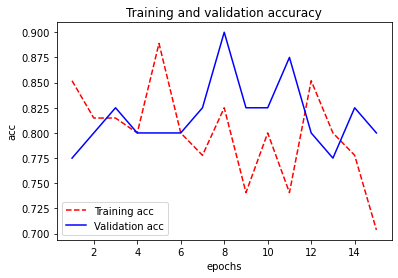

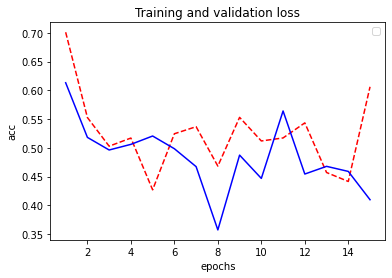

<Figure size 432x288 with 0 Axes>

In [ ]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(1,len(acc)+1,1)

plt.plot ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and validation accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

plt.plot ( epochs,     loss, 'r--' )
plt.plot ( epochs, val_loss ,  'b' )
plt.title ('Training and validation loss'   )
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()

In [ ]:
test_lost, test_acc= model.evaluate_generator(test_generator)
print ("Test Accuracy:", test_acc)

Test Accuracy: 0.7142857313156128
